# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Data Validation

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
# Loading the dataset and showing firt five rows
df = pd.read_csv("recipe_site_traffic_2212.csv")
df.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [2]:
# columns
df.columns

Index(['recipe', 'calories', 'carbohydrate', 'sugar', 'protein', 'category',
       'servings', 'high_traffic'],
      dtype='object')

In [3]:
# General information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB


In [4]:
# Null values
df.isnull().sum()

recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64

In [5]:
# recipe columns
df.recipe.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
# calories columns
df.calories.unique()

array([        nan, 3.54800e+01, 9.14280e+02, 9.70300e+01, 2.70500e+01,
       6.91150e+02, 1.83940e+02, 2.99140e+02, 5.38520e+02, 2.48280e+02,
       1.70120e+02, 1.55800e+02, 2.74630e+02, 2.52300e+01, 2.17140e+02,
       3.16450e+02, 4.54270e+02, 1.69582e+03, 1.09075e+03, 1.27550e+02,
       9.26000e+00, 4.05300e+01, 8.27300e+01, 1.16149e+03, 5.62900e+01,
       4.11160e+02, 5.74750e+02, 5.95390e+02, 1.64760e+02, 2.15980e+02,
       6.17110e+02, 3.47060e+02, 4.97170e+02, 5.75630e+02, 7.96890e+02,
       1.32178e+03, 4.45500e+01, 2.64620e+02, 4.48100e+01, 6.21540e+02,
       2.90100e+02, 5.76890e+02, 2.62120e+02, 6.42900e+01, 8.33900e+01,
       6.90100e+01, 4.39100e+01, 1.72425e+03, 2.93360e+02, 1.27953e+03,
       3.67300e+02, 7.45600e+01, 1.31510e+02, 2.12224e+03, 4.71700e+01,
       1.91780e+02, 6.23000e+00, 3.84930e+02, 6.16950e+02, 1.87870e+02,
       1.60050e+02, 8.13080e+02, 5.66200e+02, 2.60330e+02, 6.17800e+01,
       7.17720e+02, 1.10515e+03, 7.99390e+02, 1.00000e+02, 2.508

In [7]:
# carbohydrate columns
df.carbohydrate.unique()

array([       nan, 3.8560e+01, 4.2680e+01, 3.0560e+01, 1.8500e+00,
       3.4600e+00, 4.7950e+01, 3.1700e+00, 3.7800e+00, 4.8540e+01,
       1.7630e+01, 8.2700e+00, 2.3490e+01, 1.1510e+01, 6.6900e+00,
       2.6500e+00, 1.8700e+00, 1.0000e-01, 4.6500e+00, 2.7550e+01,
       1.7440e+01, 8.7910e+01, 1.5300e+00, 2.2350e+01, 5.1700e+01,
       1.3120e+01, 6.2670e+01, 3.3580e+01, 5.2660e+01, 2.3100e+01,
       9.5000e+00, 1.4700e+00, 2.0710e+01, 2.9100e+01, 7.0070e+01,
       9.9820e+01, 1.5000e+00, 4.6200e+00, 1.4160e+01, 4.4300e+00,
       4.7900e+00, 1.7460e+01, 1.6950e+01, 1.3060e+01, 3.9170e+01,
       4.8160e+01, 4.5520e+01, 1.9160e+01, 1.9560e+01, 8.9840e+01,
       4.7470e+01, 3.3320e+01, 2.5990e+01, 6.0930e+01, 9.1700e+00,
       5.6430e+01, 7.4380e+01, 6.9450e+01, 5.5510e+01, 4.2450e+01,
       8.8550e+01, 1.7200e+00, 5.1000e-01, 1.3870e+01, 7.1210e+01,
       6.6300e+00, 2.3140e+01, 9.5890e+01, 1.8110e+01, 1.3090e+01,
       1.0500e+01, 8.3790e+01, 2.4760e+01, 3.6780e+01, 2.6700e

In [8]:
# sugar columns
df.sugar.unique()

array([       nan, 6.6000e-01, 3.0900e+00, 3.8630e+01, 8.0000e-01,
       1.6500e+00, 9.7500e+00, 4.0000e-01, 3.3700e+00, 3.9900e+00,
       4.1000e+00, 9.7800e+00, 1.5600e+00, 1.0320e+01, 1.0000e+01,
       4.6800e+00, 2.9500e+00, 3.9000e-01, 6.9000e-01, 1.5100e+00,
       8.1600e+00, 1.0491e+02, 7.9500e+00, 8.8800e+00, 1.1380e+01,
       2.7780e+01, 1.8400e+00, 2.6400e+00, 1.7870e+01, 6.2500e+00,
       3.2830e+01, 5.9200e+00, 2.0000e-01, 9.6300e+00, 7.7500e+00,
       2.6200e+00, 1.8440e+01, 1.0700e+01, 1.0500e+00, 2.0920e+01,
       3.3000e-01, 7.7000e-01, 1.6200e+00, 3.9540e+01, 4.5800e+00,
       7.0000e-02, 9.4000e+00, 1.0800e+00, 6.9600e+00, 1.6360e+01,
       1.7000e+00, 5.2000e-01, 1.3820e+01, 6.5000e-01, 5.6000e+00,
       7.6530e+01, 7.7700e+00, 9.9900e+00, 1.6000e+00, 4.7000e-01,
       2.5400e+00, 1.2400e+00, 1.0680e+01, 1.4020e+01, 3.7900e+00,
       3.3300e+00, 1.0200e+01, 1.0600e+01, 3.8000e+00, 8.8300e+00,
       1.6240e+01, 5.7000e-01, 3.0000e+00, 5.8000e+00, 2.1700e

In [9]:
# protein columns
df.protein.unique()

array([       nan, 9.2000e-01, 2.8800e+00, 2.0000e-02, 5.3000e-01,
       5.3930e+01, 4.6710e+01, 3.2400e+01, 3.7900e+00, 1.1385e+02,
       9.1000e-01, 1.1550e+01, 2.5700e+00, 9.5700e+00, 1.5170e+01,
       7.9710e+01, 6.1070e+01, 3.3170e+01, 3.4900e+00, 8.9100e+00,
       1.0810e+01, 1.1930e+01, 2.6040e+01, 1.2570e+01, 3.4790e+01,
       7.0300e+01, 1.3850e+01, 4.9600e+00, 2.2014e+02, 3.2320e+01,
       4.5890e+01, 8.2580e+01, 2.9700e+00, 6.2400e+00, 2.2800e+00,
       1.9510e+01, 1.5570e+01, 3.2620e+01, 5.9000e+00, 3.9690e+01,
       4.0640e+01, 4.2900e+00, 8.7050e+01, 1.1200e+01, 3.4400e+00,
       1.7000e-01, 7.9200e+00, 4.9370e+01, 1.3200e+00, 1.8200e+01,
       7.3350e+01, 4.5150e+01, 8.7110e+01, 8.1370e+01, 1.0800e+01,
       6.6690e+01, 2.1200e+00, 2.1700e+00, 3.1200e+00, 8.6090e+01,
       4.4380e+01, 1.3689e+02, 4.2400e+00, 4.5300e+00, 7.2000e-01,
       7.1000e+00, 7.1510e+01, 1.9750e+01, 1.1460e+02, 8.4230e+01,
       2.0900e+00, 1.0253e+02, 2.0700e+00, 3.1070e+01, 1.9550e

In [10]:
# category columns
df.category.unique()

array(['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal',
       'Chicken Breast', 'Lunch/Snacks', 'Chicken', 'Vegetable', 'Meat',
       'Dessert'], dtype=object)

In [11]:
# servings columns
df.servings.unique()

array(['6', '4', '1', '2', '4 as a snack', '6 as a snack'], dtype=object)

In [12]:
# converting to integers
df.servings.replace({'4 as a snack':4,'6 as a snack':6 }, inplace=True)
df.servings = df.servings.astype('int')
df.servings.unique()

array([6, 4, 1, 2])

In [13]:
# unique values
df.high_traffic.unique()

array(['High', nan], dtype=object)

In [14]:
# replace nan with
df.high_traffic.replace({np.nan: "No","High": "Yes"}, inplace=True)

In [15]:
# deleting duplicates
df.drop_duplicates(inplace=True)

In [16]:
# deleting null values
df.dropna(inplace=True)

In [17]:
# Final Dataset

print("Rows:",df.shape[0])
print("Columns:",df.shape[1])

Rows: 895
Columns: 8


**about the dataset**

- Removed null values for each column.

- For the high-traffic column, the high values were replaced with yes and the empty ones with no.

- in the servings column, 4 as a snack was replaced by 4, 6 as a snack by 6

- Duplicates were removed.

# Exploratory Analysis

In [18]:
df[['calories', 'carbohydrate', 'sugar', 'protein']].describe()

,calories,carbohydrate,sugar,protein
count,895.000000,895.000000,895.000000,895.000000
mean,435.939196,35.069676,9.046547,24.149296
std,453.020997,43.949032,14.679176,36.369739
min,0.140000,0.030000,0.010000,0.000000
25%,110.430000,8.375000,1.690000,3.195000
50%,288.550000,21.480000,4.550000,10.800000
75%,597.650000,44.965000,9.800000,30.200000
max,3633.160000,530.420000,148.750000,363.360000


In [19]:
# importing libraries
import seaborn as sns 
import matplotlib.pyplot as plt

In [20]:
# correlation
corr = df.corr(numeric_only=True)
corr

,recipe,calories,carbohydrate,sugar,protein,servings
recipe,1.000000,0.012920,0.044743,-0.027489,-0.058767,0.025526
calories,0.012920,1.000000,-0.028970,-0.097302,0.172477,-0.034756
carbohydrate,0.044743,-0.028970,1.000000,0.073922,-0.042795,-0.017895
sugar,-0.027489,-0.097302,0.073922,1.000000,-0.099053,-0.008617
protein,-0.058767,0.172477,-0.042795,-0.099053,1.000000,-0.017926
servings,0.025526,-0.034756,-0.017895,-0.008617,-0.017926,1.000000


[Text(0.5, 1.0, 'Correlation Between Numerical Variables')]

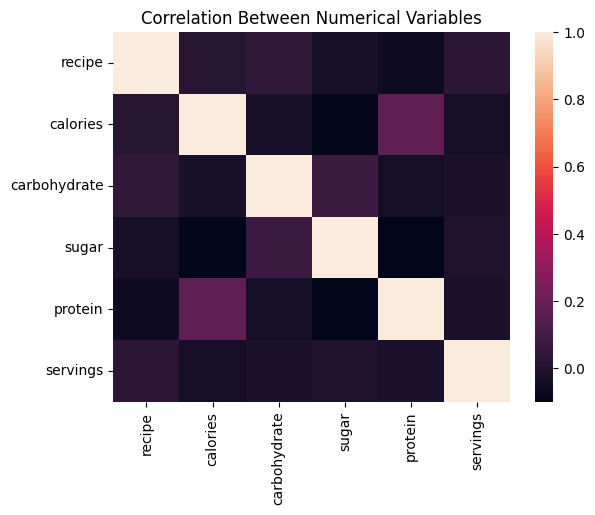

In [21]:
# Heatmap
ax = sns.heatmap(corr)
ax.set(title='Correlation Between Numerical Variables')

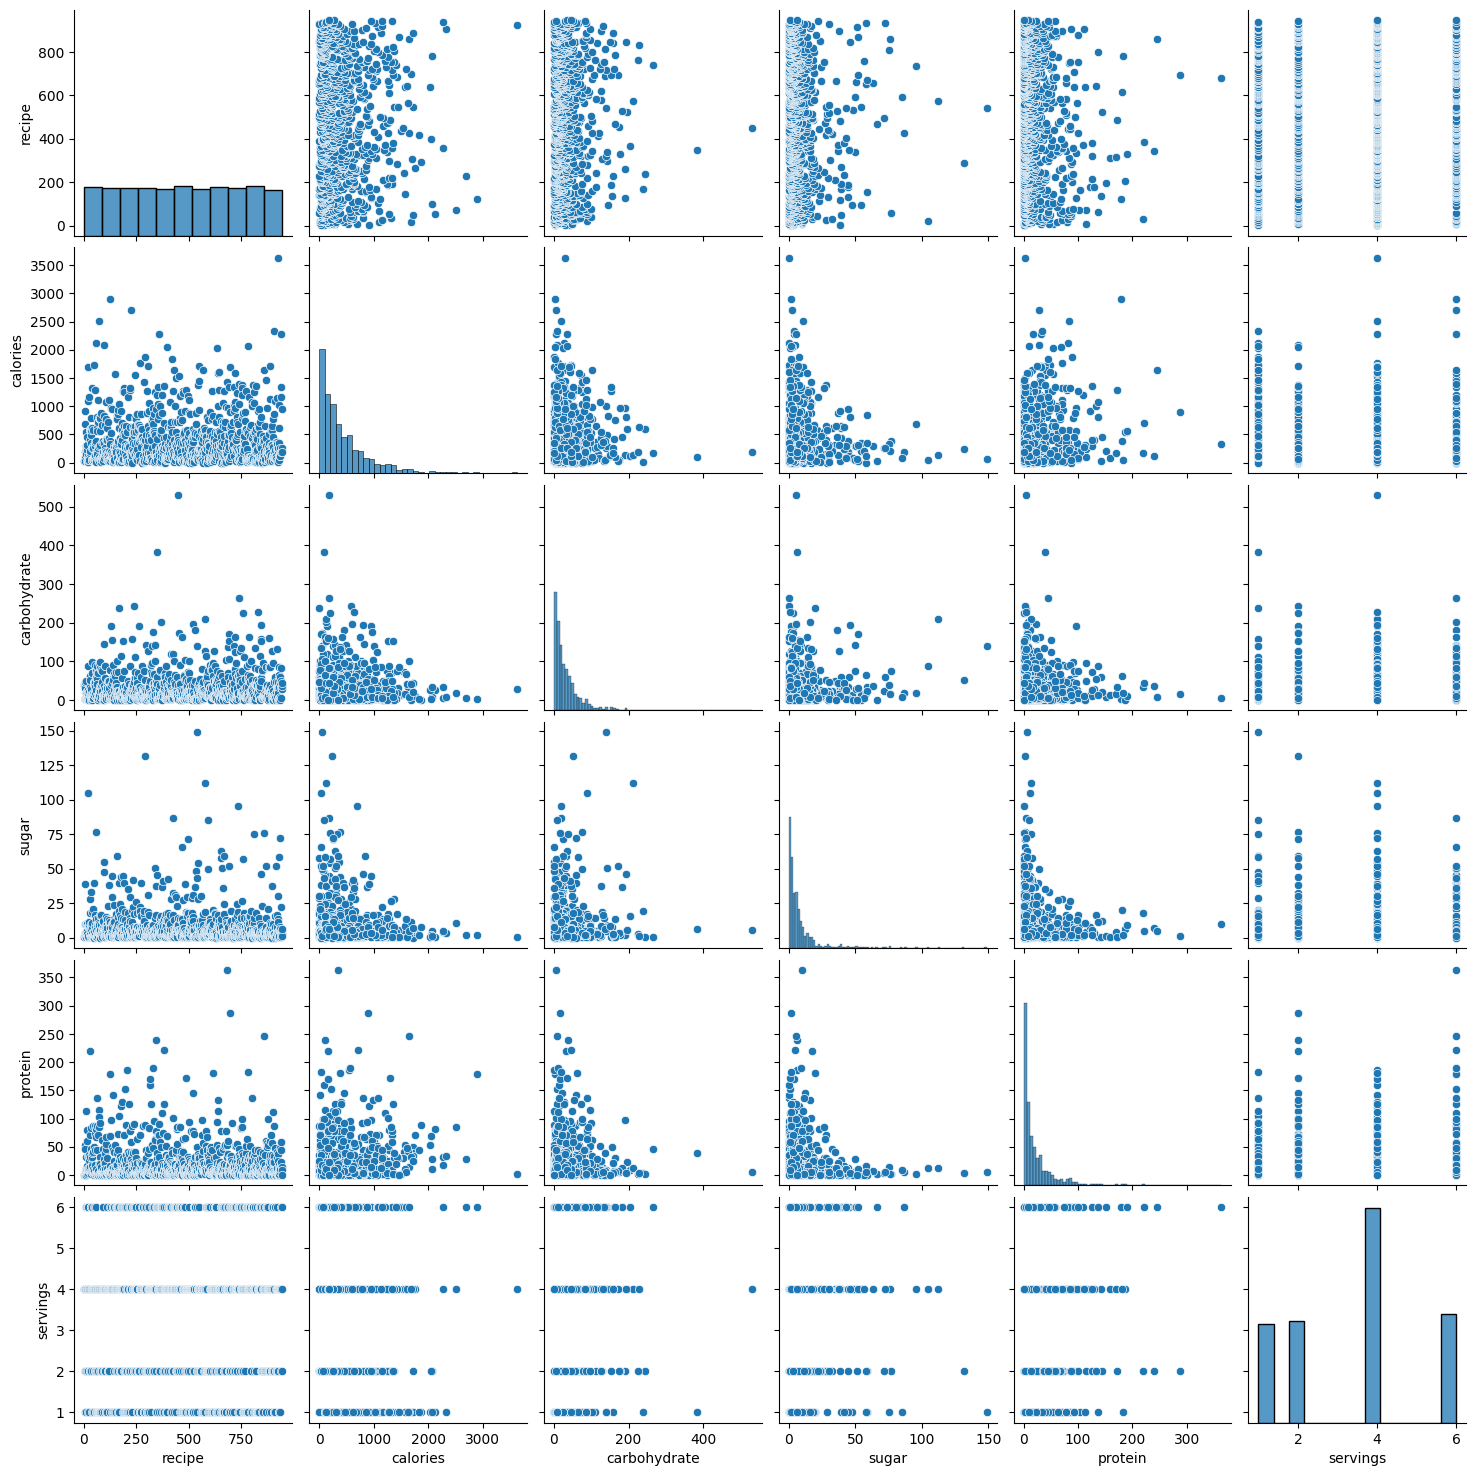

In [22]:
sns.pairplot(df)

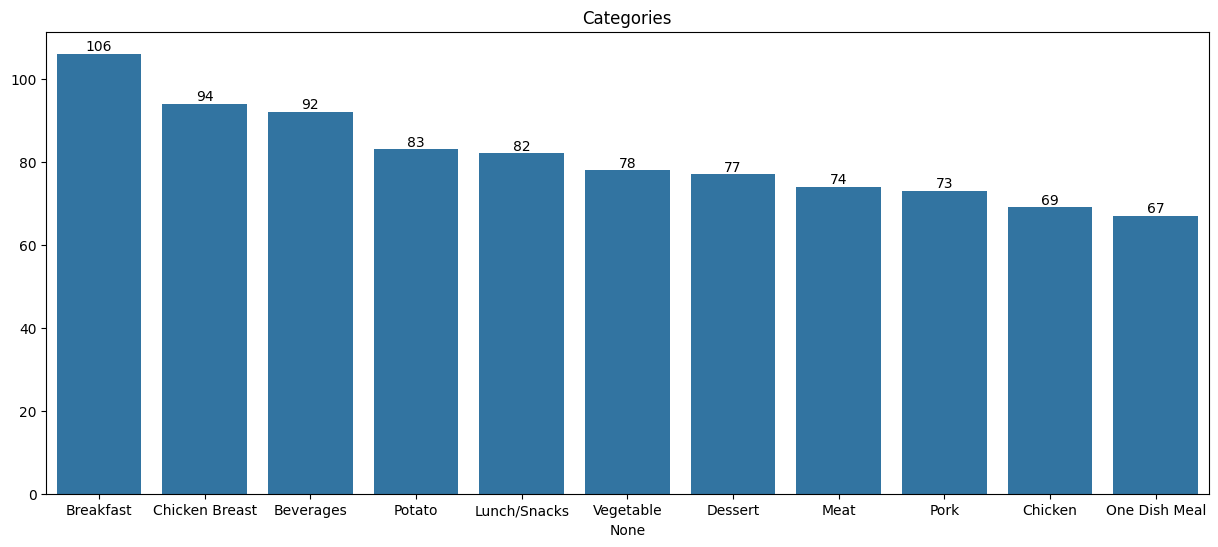

In [23]:
# Bar charts for categorical variables
sort_category = df.category.value_counts()
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=sort_category.index, y=sort_category.values )
ax.set(title='Categories')
for label in ax.containers:
    ax.bar_label(label)
plt.show()



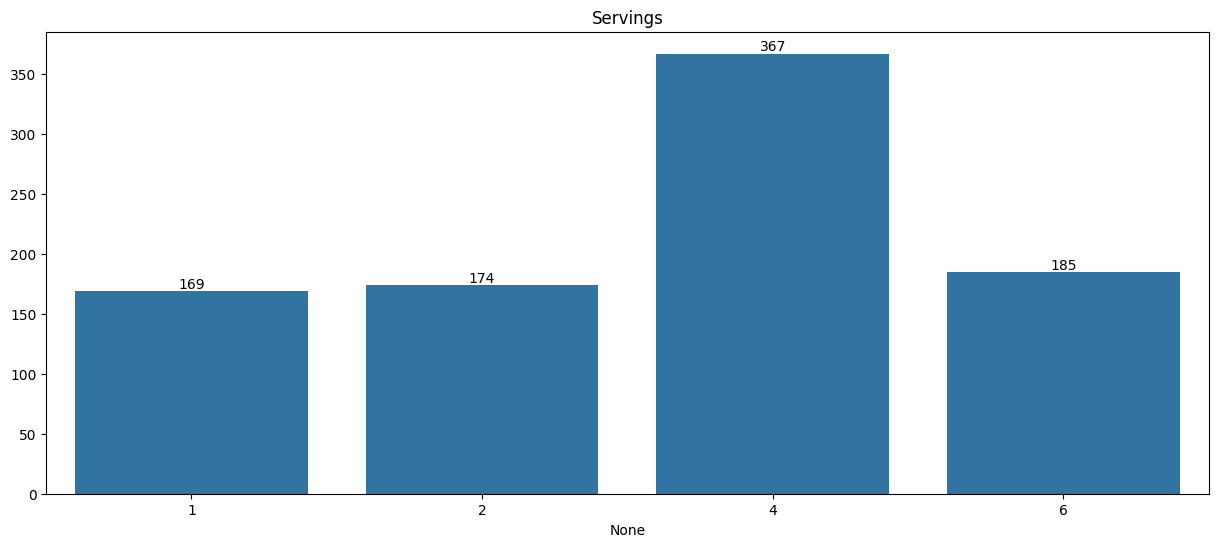

In [24]:
sort_servings = df.servings.value_counts()
plt.figure(figsize=(15, 6))
ax = sns.barplot(x=sort_servings.index, y=sort_servings.values )
ax.set(title='Servings')
for label in ax.containers:
    ax.bar_label(label)
plt.show()

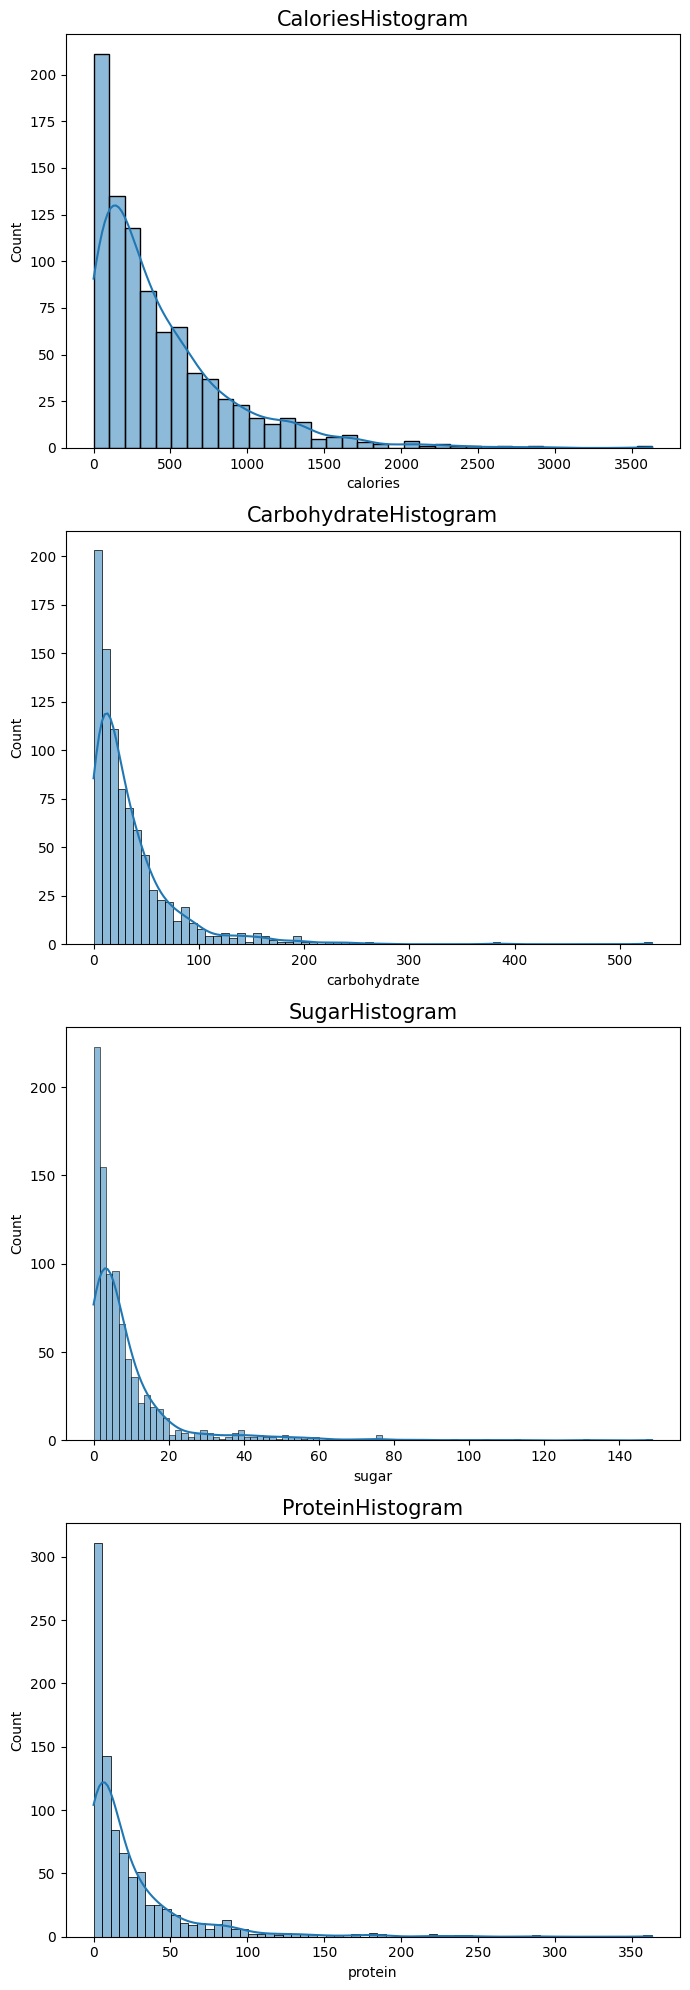

In [25]:
# histograms for continuous values
columns = ['calories', 'carbohydrate', 'sugar', 'protein']
fig, axs = plt.subplots(len(columns), figsize=(7, 20))

for i, col in enumerate(columns):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i])
    axs[i].set_title(col.capitalize(), fontsize=15)

plt.tight_layout()
plt.show()
    

**Findings**

-There is no correlation between the numerical variables

-The first three categories are Breakfast, Chiken Breast and Beverages.

-The number of servings that is repeated the most is 4.

-Continuous variables do not follow a normal distribution.

Calories mean: 435.9391955307
	
Carbohydrate mean: 35.0696759777
	
Sugar mean: 9.046547486
	
Protein mean: 24.1492960894



# Model Development

The models used for classification will be:

-Random Forest: This is an ensemble method that combines multiple decision trees to obtain a more accurate and robust prediction. Random Forests can handle categorical features well, which can be useful for recipe data.

-K-Nearest Neighbors (KNN): This is an instance-based algorithm that makes predictions based on similarity to the nearest neighbors in the training set. KNN may be a good choice if there are local patterns in the data, that is, if recipes that are “similar” tend to have the same popularity.

-Support Vector Machines (SVM): This is an algorithm that attempts to find the hyperplane that best separates classes in the feature space. SVMs are effective in high-dimensional spaces and when classes are linearly or nearly linearly separable. For recipe data, if there is a clear separation between popular and unpopular recipes based on characteristics, SVMs may be a good choice.

In [26]:
# importing libraries
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, LabelBinarizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.svm import SVC

encoder = OneHotEncoder()
scaler = MinMaxScaler()
knn = KNeighborsClassifier()
tree = RandomForestClassifier(random_state=123)
svm = SVC()
binarizer = LabelBinarizer()
kf = KFold(n_splits=5, random_state=123, shuffle=True)

In [27]:
# scaling the data
df_scaled = scaler.fit_transform(df[['calories', 'carbohydrate', 'sugar', 'protein']])
df_scaled = pd.DataFrame(df_scaled, columns=['calories', 'carbohydrate', 'sugar', 'protein'])
df_scaled.head()

,calories,carbohydrate,sugar,protein
0,0.009727,0.072645,0.004370,0.002532
1,0.251620,0.080413,0.020707,0.007926
2,0.026669,0.057561,0.259648,0.000055
3,0.007407,0.003431,0.005311,0.001459
4,0.190203,0.006467,0.011026,0.148420


In [28]:
# converting the columns
df_encoder = encoder.fit_transform(df[["servings", "category"]])
df_encoder = pd.DataFrame(df_encoder.toarray(), columns=np.concatenate(encoder.categories_))
df_encoder.columns = df_encoder.columns.astype(str)
df_encoder.head()



,1,2,4,6,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [29]:
# converting to binary
df_binarizer = binarizer.fit_transform(df['high_traffic'])
df_binarizer = pd.DataFrame(data=df_binarizer, columns=['high_traffic'])
df_binarizer.head()


,high_traffic
0,1
1,0
2,1
3,0
4,1


In [30]:
# joining the converted columns
df_model = pd.concat([df_encoder,df_scaled,df_binarizer], axis=1)
df_model.head()

,1,2,4,6,Beverages,Breakfast,Chicken,Chicken Breast,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable,calories,carbohydrate,sugar,protein,high_traffic
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.009727,0.072645,0.004370,0.002532,1
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.251620,0.080413,0.020707,0.007926,0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026669,0.057561,0.259648,0.000055,1
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.007407,0.003431,0.005311,0.001459,0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.190203,0.006467,0.011026,0.148420,1


In [31]:
# split data
X = df_model.drop(columns='high_traffic')
y = df_model['high_traffic'] 

Since the classes are unbalanced, the oversampling technique will be used to make them equal.

In [32]:
# data balancing

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X, y = smote.fit_resample(X, y)

In [33]:
# verifying that they are the same
y.value_counts()

1    535
0    535
Name: high_traffic, dtype: int64

In [34]:
# separating the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

## Creating classification models

In [35]:
# Random Forest
tree.fit(X_train,y_train)


RandomForestClassifier(random_state=123)

In [36]:
# Predict
tree_pred = tree.predict(X_test)
tree_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

In [37]:
# KNN
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [38]:
# Predict
knn_pred = knn.predict(X_test)
knn_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,

In [39]:
# SVM 
svm.fit(X_train,y_train)

SVC()

In [40]:
# Predict
svm_pred = svm.predict(X_test)
svm_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,

# Model Evaluation

## Metrics


![Captura](Captura.PNG)
![Captura1](Captura1.PNG)


In [41]:
# Importing metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def metrics(test, pred):
    print('Confusion Matrix:')
    print(confusion_matrix(test, pred))
    print('Acuracy:',accuracy_score(test, pred))
    print('Precision:',precision_score(test, pred))
    print('Recall:',recall_score(test, pred))

In [42]:
# Random Forest metrics
metrics(y_test, tree_pred)

Confusion Matrix:
[[128  36]
 [ 33 124]]
Acuracy: 0.7850467289719626
Precision: 0.775
Recall: 0.7898089171974523


In [43]:
# KNN metrics
metrics(y_test, knn_pred)

Confusion Matrix:
[[123  41]
 [ 48 109]]
Acuracy: 0.7227414330218068
Precision: 0.7266666666666667
Recall: 0.6942675159235668


In [44]:
# SVM metrics
metrics(y_test, svm_pred)

Confusion Matrix:
[[123  41]
 [ 40 117]]
Acuracy: 0.7476635514018691
Precision: 0.740506329113924
Recall: 0.7452229299363057


## Cross Validation

Cross validation is then performed to measure the overall performance of the model.

In [45]:
cross_tree = cross_val_score(tree,X, y, cv=kf, scoring='accuracy' )
cross_logistic = cross_val_score(knn, X, y, cv=kf, scoring='accuracy')
cross_svm = cross_val_score(svm, X, y, cv=kf, scoring='accuracy')
print('cross validation Random Forest:',cross_tree.mean())
print('cross validation KNN:',cross_logistic.mean())
print('cross validation SVM:',cross_svm.mean())

cross validation Random Forest: 0.7757009345794392
cross validation KNN: 0.7411214953271028
cross validation SVM: 0.7439252336448599


**Choosing the best model**

Based on the results provided and taking into account that the main metric for choosing the model is accuracy with a target of 80%, the Random Forest model seems to be the best option, although it does not reach the target of 80%. . Here are the reasons:

Accuracy: Random Forest has the highest accuracy (0.785), which is closer to the target of 80% compared to KNN (0.723) and SVM (0.748). This means that Random Forest made the most correct predictions.

Cross Validation: The cross validation score for Random Forest (0.776) is the highest, suggesting that this model is the most robust and will likely perform well with unseen data.



**Business Metrics**

-Traffic to subscription conversion rate: This is the proportion of website visitors that convert to subscribers. An increase in this metric would indicate that popular recipes are driving more subscriptions.

-High traffic percentage: This is the proportion of days that the website experiences high traffic. An increase in this metric would indicate that the prediction model is performing well.

-Prediction Model Accuracy: This is the proportion of times our model correctly predicts whether a recipe will generate high traffic.

**Conclusion**

In this project, three machine learning models were evaluated: Random Forest, KNN and SVM, using various metrics such as accuracy, precision, recall and cross-validation. Although the goal was to achieve an accuracy of 80%, the Random Forest model proved to be the most effective, with an accuracy of 78.5%, the closest to the goal. However, one could consider the need for further adjustments to the model or exploration of other models to improve accuracy. In summary, this project demonstrated the importance of rigorous model evaluation and selection based on defined metrics to achieve desired objectives.


**Recommendations**

-A/B Testing: Perform A/B testing to evaluate the effectiveness of the prediction model. This could involve showing the recipes selected by the model to a portion of the website visitors and comparing the results with a control group.

-Additional data collection: Consider collecting more data about recipes and website visitors. This could include details such as recipe ingredients, user preferences, time spent on the website, etc. This additional data could help improve the accuracy of the prediction model.
-User feedback: Implement a system to collect user feedback on recipes. Not only could this provide valuable information to improve recipes, but it could also be used to improve the prediction model.


